# NACA0012

## 无量纲化
来流条件：
$$p_0 = 75446 Pa ,\quad \rho_0 = 1.248 kg/m^3, \quad u_0 = 203.65 m/s, \quad Ma = 0.7, \quad T = 283.24 $$

$$ L_\inf = 1m,\quad p^* = \frac{p}{\rho_\infty u_\infty^2} = 1.458, u_\infty = 1,\rho_\infty = 1 , T^* = T/T_{\infty}$$

$$ \mu^* = \frac{\mu}{\mu_\infty}, \quad T^* = \frac{T}{T_\infty}, \quad e^* = \frac{e}{v_\infty}, Re = \frac{\rho_\infty u_\infty L}{\mu_\infty}, M = \frac{u_\infty}{\sqrt{\gamma RT_\infty}}, Pr = \frac{c_p \mu}{k} $$

$$ p^* = (\gamma -1) \rho^* e^*, T^* = \frac{\gamma M^2 p^*}{\rho^*}$$

## NS equation

$$\frac{\partial {\bf u}}{\partial t} + \frac{\partial { \bf f}}{\partial x} +\frac{\partial { \bf g }}{\partial y} = \frac{\partial {\bf s_x}}{\partial x} + \frac{\partial {\bf s_y}}{\partial y} $$

$${\bf u} = (\rho,\rho u,\rho v, E)^T$$, $$ {\bf f} = (\rho u, \rho u^2,\rho u v,(E+p)u)^T $$
$${\bf g} = (\rho v, \rho u v,\rho v^2+p, (E+p)v)^T$$
$${\bf s_x} = \frac{1}{Re}(0,\tau_{xx},\tau_{xy},\tau_{xx}u+\tau_{xy}v-q_x)^T$$
$${\bf s_y} = \frac{1}{Re}(0,\tau_{yx},\tau_{yy},\tau_{yx}u+\tau_{yy}v-q_y)^T$$

$$ E = \rho e + \frac{1}{2}\rho(u^2 +v^2) $$
$$ e = \frac{1}{\gamma -1} \frac{p}{\rho}$$
$$ p = \rho R T$$
$$\tau_{xx} = 2/3\mu(2u_x - v_y)$$
$$\tau_{yy} = 2/3\mu(2v_y - u_x)$$
$$\tau_{xy} =\tau_{yx} = \mu (u_y + v_x)$$
$$q_x = -\frac{c_p \mu}{Pr Re}\frac{\partial T}{\partial x}$$
$$q_y = -\frac{c_p \mu}{Pr Re}\frac{\partial T}{\partial y}$$

$$ p = \rho R T$$

## 简化
$$ U2_t = (\rho u)_t = \rho_t u+u_t \rho$$
$$ p_t = \rho_t R T + \rho R T_t $$
$$ U3_t = E_t = 1/(\gamma -1) p_t + 1/2 \rho_t (u^2 + v^2) + \rho (uu_t + vv_t) $$ 
$$ F1_x = \rho_x u + \rho u_x $$
$$ F2_x = \rho_x u^2 + 2\rho u u_x$$
$$ F3_x = \rho_x uv + \rho u v_x + \rho u_x v$$
$$ F4_x = (E_x +p_x) u + (E + p) u_x v$$

$$ S1_{xx} = 0 $$
$$ S2_{xx} = \frac{1}{Re} \left(2/3\mu_x(2u_x -v_y) + 2/3 \mu (2u_{xx} -v_{xy})\right) $$
$$ S3_{xx} = \frac{1}{Re} \left(\mu_x(u_y +v_x) + \mu (u_{xy} +v_{xx})\right) $$
$$ S4_{xx} =  S2_{xx} u + S3_{xx} v + \tau_{xx} u_x +\tau_{xy}v_x + q_{xx}  $$

$$ q_{xx} = \frac{c_P}{Pr Re}  (\mu_x T_x + \mu T_{xx})$$

## 粘性系数

$$\mu = \frac{\mu_0}{T_0^{3/2}} T^{3/2}\frac{T_0+S}{T+S}$$

$$\mu_x = \frac{\mu_0(T_0 +S) }{T_0^{3/2}} \frac{\sqrt{T}(T+3S)}{2(T+S)^2} T_x$$

## 非守恒NS

$$\frac{\partial \rho}{\partial t} + u \frac{\partial \rho}{\partial x} + v{\partial \rho}{\partial y} + \rho \Delta = 0 $$
$$ \rho(\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + u\frac{\partial u}{\partial x} + \frac{\partial p}{\partial x} = \frac{\mu}{\Re}(4/3 v_{yy} - 2/3 u_{xy} +v_{xy}+u_{yy}+4/3 u_{xx}-2/3v_{xy}) $$

## 数据

$$ y= \pm 0.594689181 \cdot (0.298222773 \cdot \sqrt{x} - 0.127125232 \cdot x \\ - 0.357907906 \cdot x^2 + 0.291984971 \cdot x^3 - 0.105174606 \cdot x^4 )
$$

In [1]:
def Naca0012data(x):
    a = 0.594689181
    b = 0.298222773  
    c = 0.127125232 
    d = 0.357907906 
    e = 0.291984971 
    f = 0.105174606 
    y1 = a*(b*np.sqrt(x) - c*x-d*x**2+e*x**3 - f*x**4)
    y2 = -y1
    dy1 =  a*(0.5*b/np.sqrt(x) - c - 2*d*x +3*e*x**2 - 4*f*x**3)
    dy2 = -a*(0.5*b/np.sqrt(x) - c - 2*d*x +3*e*x**2 - 4*f*x**3)
    return y1,y2,dy1,dy2

## solver

In [2]:
import torch
import torch.nn as nn
import numpy as np
import time
import scipy.io
import matplotlib.pyplot as plt
from numpy import arange, meshgrid
#
from smt.sampling_methods import LHS
# Seeds
torch.manual_seed(123)
np.random.seed(123)
def train(epoch):
    model.train()
    def closure():
        optimizer.zero_grad()                                                     # Optimizer
        loss_pde = model.loss_pde(x_int_train)                                    # Loss function of PDE
        loss_ic = model.loss_ic(x_ic_train, rho_ic_train,u_ic_train,v_ic_train,T_ic_train)   # Loss function of IC
        loss_bdL = model.loss_bc(x_bcL_train, rho_bcL_train,u_bcL_train,v_bcL_train,T_bcL_train)   # Loss function of IC
       # loss_bdR = model.loss_bc1(x_bcR_train,rho_bcR_train,u_bcR_train,v_bcR_train,p_bcR_train)   # Loss function of IC
        #loss_cut = model.loss_bc1(x_cut_train,rho_cut_train,u_cut_train,v_cut_train,p_cut_train) 
        loss_bdI = model.bd_B(x_bcI_train, sin_bcI_train,cos_bcI_train)  

        loss_ib = loss_ic  +  loss_bdI #+loss_bdL
        loss = loss_pde + 10*loss_ib

        # Print iteration, loss of PDE and ICs
        print(f'epoch {epoch} loss_pde:{loss_pde:.8f}, loss_ib:{loss_ib:.8f}')
        loss.backward()
        return loss

    # Optimize loss function
    loss = optimizer.step(closure)
    loss_value = loss.item() if not isinstance(loss, float) else loss
    # Print total loss
    print(f'epoch {epoch}: loss {loss_value:.6f}')
    
# Calculate gradients using torch.autograd.grad
def gradients(outputs, inputs):
    return torch.autograd.grad(outputs, inputs,grad_outputs=torch.ones_like(outputs), create_graph=True)

# Convert torch tensor into np.array
def to_numpy(input):
    if isinstance(input, torch.Tensor):
        return input.detach().cpu().numpy()
    elif isinstance(input, np.ndarray):
        return input
    else:
        raise TypeError('Unknown type of input, expected torch.Tensor or ' \
                        'np.ndarray, but got {}'.format(type(input)))
def IC(x):
    N =x.shape[0]
    rho_init = np.zeros((x.shape[0]))                                              # rho - initial condition
    u_init = np.zeros((x.shape[0]))                                                # u - initial condition
    v_init = np.zeros((x.shape[0]))                                                # u - initial condition
    T_init = np.zeros((x.shape[0]))                                                # p - initial condition
    
    gamma = 1.4
    rho1 = 1.0
    p1 =  1.458
    v1 = 0.0
    u1 = 1.0
    T1 = 1.0
    
    rho2 = 1.0
    p2 = 1.
    v2 = 0.0
    #u1 = ms*npsqrt(gamma)
    u2 = 0.0
    # rho, p - initial condition
    for i in range(N):
        rho_init[i] = rho1
        u_init[i] =   u1
        v_init[i] =  v1
        T_init[i] =  T1
    return rho_init, u_init, v_init,T_init

def BC_L(x):
    N =x.shape[0]
    rho_init = np.zeros((x.shape[0]))                                              # rho - initial condition
    u_init = np.zeros((x.shape[0]))                                                # u - initial condition
    v_init = np.zeros((x.shape[0]))                                                # u - initial condition
    T_init = np.zeros((x.shape[0]))                                                # p - initial condition
    
    gamma = 1.4
    #u1 = ms*npsqrt(gamma)
    # rho, p - initial condition
    rho1 = 1.00
    T1 =  1.0
    v1 = 0.0
    u1 = 1.0
    for i in range(N):
        rho_init[i] = rho1
        u_init[i] =  u1
        v_init[i] =  v1
        T_init[i] =  T1
    return rho_init, u_init, v_init,T_init
def BC_R(x):
    N =x.shape[0]
    rho_init = np.zeros((x.shape[0]))                                              # rho - initial condition
    u_init = np.zeros((x.shape[0]))                                                # u - initial condition
    v_init = np.zeros((x.shape[0]))                                                # u - initial condition
    p_init = np.zeros((x.shape[0]))                                                # p - initial condition
    
    gamma = 1.4
    ms = 2.0
    rho1 = 1.0
    p1 = 1.0
    v1 = 0.0
    u1 = 0
    # rho, p - initial condition
    for i in range(N):
        rho_init[i] = rho1
        u_init[i] = u1
        v_init[i] = v1
        p_init[i] = p1

    return rho_init, u_init, v_init,p_init
def BC_Cut(x):
    N =x.shape[0]
    rho_init = np.zeros((x.shape[0]))
    u_init = np.zeros((x.shape[0]))
    v_init = np.zeros((x.shape[0]))
    p_init = np.zeros((x.shape[0]))
    
    gamma = 1.4
    ms = 2.0
    rho1 = 1.0
    p1 = 1.0
    v1 = 0.0
    u1 = 0
    # rho, p - initial condition
    for i in range(N):
        rho_init[i] = 10.01
        u_init[i] =  0
        v_init[i] = 0
        p_init[i] = 10.01

    return rho_init, u_init, v_init,p_init
    
class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()
        self.net = nn.Sequential()                                                  # Define neural network
        self.net.add_module('Linear_layer_1', nn.Linear(3, 90))                     # First linear layer
        self.net.add_module('Tanh_layer_1', nn.Tanh())                              # First activation Layer

        for num in range(2, 6):                                                     # Number of layers (2 through 7)
            self.net.add_module('Linear_layer_%d' % (num), nn.Linear(90, 90))       # Linear layer
            self.net.add_module('Tanh_layer_%d' % (num), nn.Tanh())                 # Activation Layer
        self.net.add_module('Linear_layer_final', nn.Linear(90, 4))                 # Output Layer

    # Forward Feed
    def forward(self, x):
        return self.net(x)

    def bd_B(self,x,sin,cos):
        yb = self.net(x)
        rhob,Tb,ub,vb = yb[:, 0:1], yb[:, 1:2], yb[:, 2:3],yb[:,3:]
        drhob_g = gradients(rhob, x)[0]                                      # Gradient [u_t, u_x]
        rhob_x, rhob_y = drhob_g[:, 1:2], drhob_g[:, 2:3]                            # Partial derivatives u_t, u_x
        dub_g = gradients(ub, x)[0]                                      # Gradient [u_t, u_x]
        ub_x, ub_y = dub_g[:, 1:2], dub_g[:, 2:3]                            # Partial derivatives u_t, u_x
        dvb_g = gradients(vb, x)[0]                                      # Gradient [u_t, u_x]
        vb_x, vb_y = dvb_g[:, 1:2], dvb_g[:, 2:3]                            # Partial derivatives u_t, u_x
        dTb_g = gradients(Tb, x)[0]                                      # Gradient [p_t, p_x]
        Tb_x, Tb_y = dTb_g[:, 1:2], dTb_g[:, 2:3]                            # Partial derivatives p_t, p_x
        
        deltau = ub_x + vb_y
        lam = 0.1*(abs(deltau) - deltau) + 1
        #lam = (deltau) - deltau) + 1
        
        fb = (((ub**2 + vb**2)/lam)**2).mean() +\
            (((Tb_x*cos + Tb_y*sin)/lam)**2).mean() +\
            (((rhob_x*cos + rhob_y*sin)/lam)**2).mean()
        return fb
    def bd_OY(self,x):
        y = self.net(x)
        rho,p,u,v = y[:, 0:1], y[:, 1:2], y[:, 2:3],y[:,3:]
        
        drho_g = gradients(rho, x)[0]                                  # Gradient [rho_t, rho_x]
        rho_x,rho_y = drho_g[:, :1], drho_g[:, 1:2]                    # Partial derivatives rho_t, rho_x
        du_g = gradients(u, x)[0]                                      # Gradient [u_t, u_x]
        u_x, u_y = du_g[:, :1], du_g[:, 1:2]                            # Partial derivatives u_t, u_x
        dv_g = gradients(v, x)[0]                                      # Gradient [u_t, u_x]
        v_x, v_y = dv_g[:, :1], dv_g[:, 1:2]                            # Partial derivatives u_t, u_x
        dp_g = gradients(p, x)[0]                                      # Gradient [p_t, p_x]
        p_x, p_y = dp_g[:, :1], dp_g[:, 1:2]                            # Partial derivatives p_t, p_x
        
        deltau = u_x + v_y
        lam = 0.1*(abs(deltau) - deltau) + 1
        
        f = ((( u_y)/lam)**2).mean() +\
            ((( v_y)/lam)**2).mean() +\
            ((( p_y)/lam)**2).mean() +\
            ((( rho_y)/lam)**2).mean()
        return f
    
    def bd_OX(self,x):
        y = self.net(x)
        rho,p,u,v = y[:, 0:1], y[:, 1:2], y[:, 2:3],y[:,3:]
        
        drho_g = gradients(rho, x)[0]                                  # Gradient [rho_t, rho_x]
        rho_x,rho_y = drho_g[:, :1], drho_g[:, 1:2]                    # Partial derivatives rho_t, rho_x
        du_g = gradients(u, x)[0]                                      # Gradient [u_t, u_x]
        u_x, u_y = du_g[:, :1], du_g[:, 1:2]                            # Partial derivatives u_t, u_x
        dv_g = gradients(v, x)[0]                                      # Gradient [u_t, u_x]
        v_x, v_y = dv_g[:, :1], dv_g[:, 1:2]                            # Partial derivatives u_t, u_x
        dp_g = gradients(p, x)[0]                                      # Gradient [p_t, p_x]
        p_x, p_y = dp_g[:, :1], dp_g[:, 1:2]                            # Partial derivatives p_t, p_x
        
        deltau = u_x + v_y
        lam = 0.1*(abs(deltau) - deltau) + 1
        
        f = ((( u_x)/lam)**2).mean() +\
            ((( v_x)/lam)**2).mean() +\
            ((( p_x)/lam)**2).mean() +\
            ((( rho_x)/lam)**2).mean()
        return f
     
    # Loss function for PDE
    def loss_pde(self, x):
        
        y = self.net(x)
        gamma = 1.4                                                    # Heat Capacity Ratio
        epsilon = 1e-5
        rho,T,u,v = y[:, 0:1], y[:, 1:2], y[:, 2:3],y[:,3:]
        
        drho_g = gradients(rho,x)[0]
        rho_t,rho_x,rho_y = drho_g[:, :1],drho_g[:,1:2],drho_g[:,2:3]
        dT_g = gradients(T,x)[0]
        T_t,T_x,T_y = dT_g[:, :1],dT_g[:,1:2],dT_g[:,2:3]
        du_g = gradients(u,x)[0]
        u_t,u_x,u_y = du_g[:, :1],du_g[:,1:2],du_g[:,2:3]
        dv_g = gradients(v,x)[0]
        v_t,v_x,v_y = dv_g[:, :1],dv_g[:,1:2],dv_g[:,2:3]
        dux_g = gradients(u_x,x)[0]
        u_xx,u_xy = dux_g[:,1:2],dux_g[:,2:3]
        duy_g = gradients(u_y,x)[0]
        u_yy = duy_g[:,2:3]
        dvx_g = gradients(v_x,x)[0]
        v_xx,v_xy = dvx_g[:,1:2],dvx_g[:,2:3]
        dvy_g = gradients(v_y,x)[0]
        v_yy = dvy_g[:,2:3]
        dTx_g = gradients(T_x,x)[0]
        T_xx = dvy_g[:,1:2]
        dTy_g = gradients(T_y,x)[0]
        T_yy = dvy_g[:,2:3]
        
        
        Ma = 0.7
        gamma = 1.4
        Re = 1e6
        Pr = 0.72
        R = 287
        T0 = 283.24
        cp = 1/(gamma-1)/Ma**2
        
        
        p = 1/gamma/Ma**2 *rho *T
        e =  p/(gamma - 1)
        E = rho*e + 0.5*rho*(u**2+v**2)
        mu =  T**(3/2)/(T+110/T0)*(1+110/T0)/Re
        
        
        p_t = 1/(gamma*Ma**2)*(rho_t*T+T_t*rho)
        p_x = 1/(gamma*Ma**2)*(rho_x*T+T_x*rho)
        p_y = 1/(gamma*Ma**2)*(rho_y*T+T_y*rho)
       # E_x = rho_x*e + rho*p_x/(gamma -1) + 0.5*rho_x*(u**2+v**2) + \
       #        rho*(u_x*u + v_x*v)
       # E_y = rho_y*e + rho*p_y/(gamma -1) + 0.5*rho_y*(u**2+v**2) + \
       #        rho*(u_y*u + v_y*v)
        mu_x = 0.5*(1+110/T0)*(T**(3/2)+3*T**(1/2)*110/T0)/(T+110/T0)**2/Re*T_x
        mu_y = 0.5*(1+110/T0)*(T**(3/2)+3*T**(1/2)*110/T0)/(T+110/T0)**2/Re*T_y
        
      #  U1_t = rho_t
      #  U2_t = rho_t*u + rho*u_t
      #  U3_t = rho_t*v + rho*v_t
      #  U4_t = rho_t*e + rho*p_t/(gamma -1) + 0.5*rho_t*(u**2+v**2) + \
      #         rho*(u_t*u + v_t*v)
      #      
      #  
      #  f1_x = rho_x*u + u_x*rho
      #  f2_x = rho_x*u**2 + 2*rho*u*u_x + p_x
      #  f3_x = rho_x*u*v + rho*u_x*v + rho*u*v_x
      #  f4_x = u_x*(E+p) +u*(E_x + p_x)
      #  
      #  g1_y = rho_y*v + v_y*rho
      #  g2_y = rho_y*u*v + rho*u_y*v + rho*u*v_y
      #  g3_y = rho_y*v**2 + 2*rho*v*v_y + p_y
      #  g4_y = v_y*(E+p) +v*(E_y + p_y)
      #  
      #  sx1_x = 0
      #  sx2_x = 2/3*mu_x*(2*u_x-v_y) +2/3*mu*(2*u_xx -v_xy)
      #  sx3_x = mu_x*(u_y+v_x) +mu*(u_xy+v_xx)
      #  sx4_x = sx2_x*u + 2/3*mu*(2*u_x-v_y)*u_x + sx3_x*v + mu*(u_y+v_x)*v_x+\
      #          cp/Pr*mu_x*T_x + cp/Pr*mu*T_xx
      #  
      #  sy1_y = 0
      #  sy2_y = mu_y*(u_y+v_x) +mu*(u_yy+v_xy)
      #  sy3_y = 2/3*mu_y*(2*v_y-u_x) +2/3*mu*(2*v_yy -u_xy)
      #  sy4_y = sy2_y*u + mu*(u_y+v_x)*u_y + sy3_y*v + 2/3*mu*(2*v_y-u_x)*v_y+\
      #          cp/Pr*mu_y*T_y + cp/Pr*mu*T_yy
        
        
        deltau = u_x + v_y
        nab = abs(deltau) - deltau            
        lam = 0.1*nab + 1
        
       # f = (((U1_t + f1_x+g1_y-sx1_x-sy1_y )/lam)**2).mean() +\
       #     (((U2_t + f2_x+g2_y-sx2_x-sy2_y )/lam)**2).mean() +\
       #     (((U3_t + f3_x+g3_y-sx3_x-sy3_y )/lam)**2).mean() +\
       #     (((U4_t + f4_x+g4_y-sx4_x-sy4_y )/lam)**2).mean()
        
        f = (((rho_t + (rho_x*u+rho_y*v) + rho*deltau)/lam)**2).mean() +\
             (((rho*(u_t +u_y*v + u_x*u)+p_x \
             -mu_x*(4/3*u_x-2/3*v_y)-mu_y*(u_y+v_x)\
             -mu*(4/3*u_xx +1/3*v_xy +u_yy))/lam)**2).mean() +\
             ((( rho*(v_t+u*v_x + v*v_y)+p_y \
             -mu_x*(u_y+v_x)- 2/3*mu_y*(2*v_y-u_x)\
             -mu*(1/3*u_xy+v_xx + 4/3*v_yy))/lam)**2).mean() + \
             (((rho*T_t +rho*(u*T_x + v*T_y)+(gamma-1)*T*deltau - \
             (gamma-1)*gamma*Ma**2*mu*(1/3*(deltau)**2 + (u_x)**2+(u_y)**2+(v_x)**2 + (v_y)**2)\
             -gamma/Pr*(mu_x*T_x+mu*T_xx+mu_y*T_y+mu*T_yy))/lam)**2).mean()
        return f

    # Loss function for initial condition
    def loss_ic(self, x_ic, rho_ic, u_ic, v_ic,T_ic):
        U_ic = self.net(x_ic)                                                      # Initial condition
        rho_ic_nn, T_ic_nn,u_ic_nn,v_ic_nn = U_ic[:, 0], U_ic[:, 1], U_ic[:, 2],U_ic[:,3]            # rho, u, p - initial condition

        # Loss function for the initial condition
        loss_ics = ((u_ic_nn - u_ic) ** 2).mean() + \
               ((rho_ic_nn- rho_ic) ** 2).mean()  + \
               ((T_ic_nn - T_ic) ** 2).mean() +\
               ((v_ic_nn - v_ic) ** 2).mean()

        return loss_ics

    def loss_bc(self, x_ic, rho_ic, u_ic, v_ic,T_ic):
        U_ic = self.net(x_ic)                                                      # Initial condition
        rho_ic_nn, T_ic_nn,u_ic_nn,v_ic_nn = U_ic[:, 0], U_ic[:, 1], U_ic[:, 2],U_ic[:,3]            # rho, u, p - initial condition

        # Loss function for the initial condition
        loss_ics = ((u_ic_nn - u_ic) ** 2).mean() + \
               ((rho_ic_nn- rho_ic) ** 2).mean()  + \
               ((T_ic_nn - T_ic) ** 2).mean() +\
               ((v_ic_nn - v_ic) ** 2).mean()

        return loss_ics
    def loss_bc1(self, x_ic, rho_ic, u_ic, v_ic,p_ic):
        U_ic = self.net(x_ic)                                                      # Initial condition
        rho_ic_nn, p_ic_nn,u_ic_nn,v_ic_nn = U_ic[:, 0], U_ic[:, 1], U_ic[:, 2],U_ic[:,3]            # rho, u, p - initial condition

        # Loss function for the initial condition
        loss_ics = ((rho_ic_nn- rho_ic) ** 2).mean()  + \
               ((p_ic_nn - p_ic) ** 2).mean() 

        return loss_ics

def BD_naca0012(t,xb,yb,n):
    x = np.zeros((2*n,3)) 
    sin = np.zeros((2*n,1)) 
    cos = np.zeros((2*n,1)) 

    for i in range(n):
        xd = np.random.rand()
        yd1,yd2,dy1,dy2 = Naca0012data(xd)
        
        x[i,0] = np.random.rand()*t
        x[i,1] = xb + xd
        x[i,2] = yb  + yd1
        cos[i,0] = -dy1/np.sqrt(dy1**2 + 1)
        sin[i,0] =   1/np.sqrt(dy1**2 + 1)
    for i in range(n):
        xd = np.random.rand()
        yd1,yd2,dy1,dy2 = Naca0012data(xd)
        
        x[i+n,0] = np.random.rand()*t
        x[i+n,1] = xb + xd
        x[i+n,2] = yb  + yd2
        cos[i+n,0] = -dy2/np.sqrt(dy2**2 + 1)
        sin[i+n,0] =  1/np.sqrt(dy2**2 + 1)
    return x, sin,cos
def BD_circle(t,xc,yc,r,n):
    x = np.zeros((n,3)) 
    sin = np.zeros((n,1)) 
    cos = np.zeros((n,1)) 

    for i in range(n):
        the = 2*np.random.rand()*np.pi
        xd = np.cos(the + np.pi/2)
        yd = np.sin(the + np.pi/2)
        x[i,0] = np.random.rand()*t
        x[i,1] = xc  + xd*r
        x[i,2] = yc  + yd*r
        cos[i,0] = xd 
        sin[i,0] = yd
        #cos[i,0] = 1
        #sin[i,0] = 0
    return x, sin,cos

def Pertur(x, dx):
    N =x.shape[0]
    xL = np.zeros((N,3))
    xR = np.zeros((N,3))
    xU = np.zeros((N,3))
    xD = np.zeros((N,3))
    
    for i in range(N):
        xL[i,0] = x[i,0]
        xR[i,0] = x[i,0]
        xU[i,0] = x[i,0]
        xD[i,0] = x[i,0]
        
        
        xL[i,1] = x[i,1] - dx
        xR[i,1] = x[i,1] + dx
        xU[i,1] = x[i,1]
        xD[i,1] = x[i,1]
        
        xL[i,2] = x[i,2] 
        xR[i,2] = x[i,2]
        xU[i,2] = x[i,2] + dx
        xD[i,2] = x[i,2] - dx
        
    return xL,xR,xU,xD
    
    
    
def BD_BackCorner(t,n):
    
    x = np.zeros((n,3)) 
    x2 = np.zeros((n,3)) 
    sin = np.zeros((n,1)) 
    sin2 = np.zeros((n,1)) 
    cos = np.zeros((n,1)) 
    cos2 = np.zeros((n,1)) 
    
    for i in range(n):
        x[i,0] = np.random.rand()*t
        x[i,1] = np.random.rand()*0.3 + 0.2
        x[i,2] = 1.5
        sin[i] = 1
        cos[i] = 0
    for i in range(n):
        x2[i,0] = np.random.rand()*t
        x2[i,1] = np.random.rand()*0.5
        x2[i,2] = 1.5
        sin2[i] = 1
        cos2[i] = 0
    x = np.vstack((x,x2))
    sin = np.vstack((sin,sin2))
    cos = np.vstack((cos,cos2))
    
    for i in range(n):
        x2[i,0] = np.random.rand()*t
        x2[i,1] = 0.5
        x2[i,2] = np.random.rand()*1.5
        sin2[i] = 0
        cos2[i] = 1
        
    x = np.vstack((x,x2))
    sin = np.vstack((sin,sin2))
    cos = np.vstack((cos,cos2))
    
    for i in range(n):
        x2[i,0] = np.random.rand()*t
        x2[i,1] = 0.5
        x2[i,2] = np.random.rand()*0.3 + 1.2
        sin2[i] = 0
        cos2[i] = 1
        
    x = np.vstack((x,x2))
    sin = np.vstack((sin,sin2))
    cos = np.vstack((cos,cos2))
        
    return x,sin,cos

# Solve Euler equations using PINNs
# def main():
  # Initialization
#device = torch.device('cuda')                                          # Run on CPU
device = torch.device('cuda')                                          # Run on CPU
lr = 0.001                                                           # Learning rate
num_ib = 10000                                                # Random sampled points from IC0
num_int = 50000                                                # Random sampled points in interior
Tend = 0.4
Lx = 2.0
Ly = 1.0
rx = 0.5
ry = 0.50
rd = 0.25


xlimits = np.array([[0.,Tend],[0.0, Lx], [0,Ly]])  #interal
sampling = LHS(xlimits=xlimits)
x_int_train = sampling(num_int)

#xlimits = np.array([[0.,Tend],[0.5, 2], [0.5,2]])  #interal
#sampling = LHS(xlimits=xlimits)
#x_int1_train = sampling(num_int)
#x_int_train =  np.vstack((x_int_train,x_int1_train))

A = []
for i in range(num_int):
    x = x_int_train[i,1]
    y = x_int_train[i,2]
    if ((x - rx)>0 and (x-rx)<1):
        y1,y2,dy1,dy2 = Naca0012data(x-rx)
        if ((y-ry)>y2 and (y-ry)<y1):
            A.append(i)
x_int_train = np.delete(x_int_train,A,axis=0)

#xlimits = np.array([[0.0, Tend], [1.0, 4.0], [0.2,1.0]])
#sampling = LHS(xlimits=xlimits)
#x_int_train_add = sampling(3*num_int)
#x_int_train = np.vstack((x_int_train,x_int_train_add))

#x_intL_train,x_intR_train,x_intU_train,x_intD_train = Pertur(x_int_train, 0.01)

xlimits = np.array([[0.,0.0],[0.0,Lx], [0.0,Ly]])  #interal
sampling = LHS(xlimits=xlimits)
x_ic_train = sampling(num_ib)
A = []
for i in range(num_ib):
    x = x_ic_train[i,1]
    y = x_ic_train[i,2]
    if ((x - rx)>0 and (x-rx)<1):
        y1,y2,dy1,dy2 = Naca0012data(x-rx)
        if ((y-ry)>y2 and (y-ry)<y1):
            A.append(i)
x_ic_train = np.delete(x_ic_train,A,axis=0)


#xlimits = np.array([[0.0, 0.0], [1.0, 4.0], [0.2,1.0]])
#sampling = LHS(xlimits=xlimits)
#x_ic_train_add = sampling(3*num_int)
#x_ic_train = np.vstack((x_ic_train,x_ic_train_add))


xlimits = np.array([[0.0,Tend],[0.0, 0.0], [0.0,Ly]])
sampling = LHS(xlimits=xlimits)
x_bcL_train =  sampling(num_ib)
#
#xlimits = np.array([[0.0,Tend], [Lx, Lx], [0.0,Ly]])
#sampling = LHS(xlimits=xlimits)
#x_bcR_train =  sampling(num_ib)
#
#
#xlimits = np.array([[0.0,Tend],[0.0, Lx], [Ly,Ly]])
#sampling = LHS(xlimits=xlimits)
#x_bcU_train =  sampling(num_ib)
#
#xlimits = np.array([[0.0,Tend], [0.0, Lx], [0.0,0.0]])
#sampling = LHS(xlimits=xlimits)
#x_bcD_train =  sampling(num_ib)                                           # Vectorized whole domain

#xlimits = np.array([[0.0,0.0],[0.0, Lx], [0.0,Ly]])
#sampling = LHS(xlimits=xlimits)
#x_ic_train =  sampling(num_ib)
#A = []
#for i in range(num_ib):
#    x = x_ic_train[i,1]
#    y = x_ic_train[i,2]
#    if ((x-rx)**2 + (y-ry)**2 ) < rd**2:
#        A.append(i)
#x_ic_train = np.delete(x_ic_train,A,axis=0)


x_bcI_train,sin_bcI_train,cos_bcI_train = BD_naca0012(Tend,rx,ry,num_ib)
#x_bcI_train,sin_bcI_train,cos_bcI_train = BD_circle(Tend,rx,ry,rd,num_ib)
#x_bcI_train,sin_bcI_train,cos_bcI_train = BD_BackCorner(Tend,num_ib)

rho_bcL_train, u_bcL_train,v_bcL_train, T_bcL_train = BC_L(x_bcL_train)  
#rho_bcR_train, u_bcR_train,v_bcR_train, p_bcR_train = BC_L(x_bcR_train)  
#rho_cut_train, u_cut_train,v_cut_train, p_cut_train = BC_Cut(x_cut_train)  
rho_ic_train, u_ic_train,v_ic_train, T_ic_train = IC(x_ic_train)  


x_int_train = torch.tensor(x_int_train, requires_grad=True, dtype=torch.float32).to(device)
#x_intL_train = torch.tensor(x_intL_train,dtype=torch.float32).to(device)
#x_intR_train = torch.tensor(x_intR_train,dtype=torch.float32).to(device)
#x_intU_train = torch.tensor(x_intU_train,dtype=torch.float32).to(device)
#x_intD_train = torch.tensor(x_intD_train,dtype=torch.float32).to(device)

rho_bcL_train = torch.tensor(rho_bcL_train, dtype=torch.float32).to(device)
u_bcL_train = torch.tensor(u_bcL_train, dtype=torch.float32).to(device)
v_bcL_train = torch.tensor(v_bcL_train, dtype=torch.float32).to(device)
T_bcL_train = torch.tensor(T_bcL_train, dtype=torch.float32).to(device)

#rho_bcR_train = torch.tensor(rho_bcR_train, dtype=torch.float32).to(device)
#u_bcR_train = torch.tensor(u_bcR_train, dtype=torch.float32).to(device)
#v_bcR_train = torch.tensor(v_bcR_train, dtype=torch.float32).to(device)
#p_bcR_train = torch.tensor(p_bcR_train, dtype=torch.float32).to(device)
#
#x_bcD_train = torch.tensor(x_bcD_train,requires_grad=True, dtype=torch.float32).to(device)
#x_bcU_train = torch.tensor(x_bcU_train, requires_grad=True, dtype=torch.float32).to(device)
#x_bcR_train = torch.tensor(x_bcR_train, requires_grad=True, dtype=torch.float32).to(device)
x_bcL_train = torch.tensor(x_bcL_train, dtype=torch.float32).to(device)
x_bcI_train = torch.tensor(x_bcI_train, requires_grad=True, dtype=torch.float32).to(device)
sin_bcI_train = torch.tensor(sin_bcI_train, dtype=torch.float32).to(device)
cos_bcI_train = torch.tensor(cos_bcI_train, dtype=torch.float32).to(device)

#rho_cut_train = torch.tensor(rho_cut_train, dtype=torch.float32).to(device)
#u_cut_train = torch.tensor(u_cut_train, dtype=torch.float32).to(device)
#v_cut_train = torch.tensor(v_cut_train, dtype=torch.float32).to(device)
#p_cut_train = torch.tensor(p_cut_train, dtype=torch.float32).to(device)
#x_cut_train = torch.tensor(x_cut_train, dtype=torch.float32).to(device)

rho_ic_train = torch.tensor(rho_ic_train, dtype=torch.float32).to(device)
u_ic_train = torch.tensor(u_ic_train, dtype=torch.float32).to(device)
v_ic_train = torch.tensor(v_ic_train, dtype=torch.float32).to(device)
T_ic_train = torch.tensor(T_ic_train, dtype=torch.float32).to(device)
x_ic_train = torch.tensor(x_ic_train, dtype=torch.float32).to(device)



print('Start training...')

Start training...


In [3]:
plt.figure()
plt.scatter(x_bc[:,1],x_bc[:,2])
#plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.scatter(x_int_train[:,1],)
#plt.pcolor(x[:],u[:,1])
#plt.pcolor(x[:],u[:,2])
ax = plt.gca()
ax.set_aspect(1)
plt.show()


NameError: name 'x_bc' is not defined

In [4]:
model = DNN().to(device)

In [5]:
lr = 0.001
#optimizer = torch.optim.LBFGS(model.parameters(),lr=lr,max_iter=500)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer_Adam,gamma=0.995)
#optimizer = torch.optim.LBFGS(model.parameters(),lr=0.5,max_iter=20)
#optimizer_LBFGS = torch.optim.LBFGS(model.parameters(), lr=0.01, max_iter=50000)

In [6]:
epochs = 10000
tic = time.time()
for epoch in range(1, epochs+1):
    train(epoch)
toc = time.time()
print(f'Total training time: {toc - tic}')


epoch 1 loss_pde:0.00105937, loss_ib:2.42150235
epoch 1: loss 24.216082
epoch 2 loss_pde:0.00119504, loss_ib:2.02977276
epoch 2: loss 20.298923
epoch 3 loss_pde:0.00230486, loss_ib:1.65080416
epoch 3: loss 16.510345
epoch 4 loss_pde:0.00648937, loss_ib:1.27324080
epoch 4: loss 12.738898
epoch 5 loss_pde:0.01983634, loss_ib:0.91184562
epoch 5: loss 9.138292
epoch 6 loss_pde:0.05699433, loss_ib:0.61334276
epoch 6: loss 6.190422
epoch 7 loss_pde:0.14125687, loss_ib:0.44863969
epoch 7: loss 4.627654
epoch 8 loss_pde:0.26483583, loss_ib:0.41822833
epoch 8: loss 4.447119
epoch 9 loss_pde:0.35360000, loss_ib:0.41890967
epoch 9: loss 4.542696
epoch 10 loss_pde:0.35944355, loss_ib:0.41856265
epoch 10: loss 4.545070
epoch 11 loss_pde:0.29884043, loss_ib:0.43319675
epoch 11: loss 4.630808
epoch 12 loss_pde:0.21242659, loss_ib:0.44758114
epoch 12: loss 4.688238
epoch 13 loss_pde:0.13421009, loss_ib:0.44058663
epoch 13: loss 4.540076
epoch 14 loss_pde:0.07989044, loss_ib:0.41307506
epoch 14: loss 4

KeyboardInterrupt: 

In [27]:
lr = 0.0001
#optimizer = torch.optim.LBFGS(model.parameters(),lr=lr,max_iter=500)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer_Adam,gamma=0.995)
#optimizer = torch.optim.LBFGS(model.parameters(),lr=0.1,max_iter=10)
#optimizer_LBFGS = torch.optim.LBFGS(model.parameters(), lr=0.01, max_iter=50000)

In [ ]:
epochs = 2
tic = time.time()
for epoch in range(1, epochs+1):
    train(epoch)
toc = time.time()
print(f'Total training time: {toc - tic}')


In [28]:
lr = 0.0001
#optimizer = torch.optim.LBFGS(model.parameters(),lr=lr,max_iter=500)
#optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer_Adam,gamma=0.995)
#optimizer_LBFGS = torch.optim.LBFGS(model.parameters(), lr=0.01, max_iter=50000)

In [29]:

optimizer = torch.optim.LBFGS(model.parameters(),lr=0.5,max_iter=20)
epochs = 1000
tic = time.time()
for epoch in range(1, epochs+1):
    train(epoch)
toc = time.time()
print(f'Total training time: {toc - tic}')


epoch 1 loss_pde:0.03363353, loss_ib:0.00844427
epoch 1 loss_pde:0.03692716, loss_ib:0.02826863
epoch 1 loss_pde:0.03391111, loss_ib:0.01203153
epoch 1 loss_pde:0.03322069, loss_ib:0.00796735
epoch 1 loss_pde:0.03309247, loss_ib:0.00693440
epoch 1 loss_pde:0.03308655, loss_ib:0.00666556
epoch 1 loss_pde:0.03310243, loss_ib:0.00658988
epoch 1 loss_pde:0.03312118, loss_ib:0.00656391
epoch 1 loss_pde:0.03313914, loss_ib:0.00655066
epoch 1 loss_pde:0.03316030, loss_ib:0.00654005
epoch 1 loss_pde:0.03318403, loss_ib:0.00652974
epoch 1 loss_pde:0.03321043, loss_ib:0.00652033
epoch 1 loss_pde:0.03322602, loss_ib:0.00651493
epoch 1 loss_pde:0.03323265, loss_ib:0.00651233
epoch 1 loss_pde:0.03323390, loss_ib:0.00651086
epoch 1 loss_pde:0.03322963, loss_ib:0.00651026
epoch 1 loss_pde:0.03322074, loss_ib:0.00650984
epoch 1 loss_pde:0.03321016, loss_ib:0.00650949
epoch 1 loss_pde:0.03320366, loss_ib:0.00650853
epoch 1 loss_pde:0.03320505, loss_ib:0.00650614
epoch 1: loss 0.118076
epoch 2 loss_pde:

epoch 9 loss_pde:0.03207171, loss_ib:0.00579633
epoch 9 loss_pde:0.03198983, loss_ib:0.00579759
epoch 9 loss_pde:0.03189174, loss_ib:0.00580098
epoch 9 loss_pde:0.03178311, loss_ib:0.00580647
epoch 9 loss_pde:0.03167802, loss_ib:0.00581247
epoch 9 loss_pde:0.03156629, loss_ib:0.00581909
epoch 9 loss_pde:0.03148773, loss_ib:0.00582126
epoch 9 loss_pde:0.03134638, loss_ib:0.00582809
epoch 9 loss_pde:0.03130231, loss_ib:0.00582665
epoch 9 loss_pde:0.03127110, loss_ib:0.00582458
epoch 9 loss_pde:0.03128806, loss_ib:0.00581728
epoch 9 loss_pde:0.03133390, loss_ib:0.00580627
epoch 9 loss_pde:0.03139865, loss_ib:0.00579358
epoch 9: loss 0.090548
epoch 10 loss_pde:0.03146595, loss_ib:0.00578107
epoch 10 loss_pde:0.03150398, loss_ib:0.00577086
epoch 10 loss_pde:0.03153765, loss_ib:0.00576048
epoch 10 loss_pde:0.03150809, loss_ib:0.00575649
epoch 10 loss_pde:0.03146530, loss_ib:0.00575332
epoch 10 loss_pde:0.03137751, loss_ib:0.00575588
epoch 10 loss_pde:0.03125600, loss_ib:0.00576154
epoch 10 l

epoch 17 loss_pde:0.02814041, loss_ib:0.00527687
epoch 17 loss_pde:0.02811569, loss_ib:0.00527325
epoch 17 loss_pde:0.02814316, loss_ib:0.00526536
epoch 17 loss_pde:0.02818850, loss_ib:0.00525543
epoch 17 loss_pde:0.02820786, loss_ib:0.00524660
epoch 17 loss_pde:0.02823741, loss_ib:0.00523599
epoch 17 loss_pde:0.02818938, loss_ib:0.00523439
epoch 17: loss 0.081586
epoch 18 loss_pde:0.02816670, loss_ib:0.00523270
epoch 18 loss_pde:0.02809986, loss_ib:0.00523562
epoch 18 loss_pde:0.02802822, loss_ib:0.00523824
epoch 18 loss_pde:0.02790578, loss_ib:0.00524477
epoch 18 loss_pde:0.02783748, loss_ib:0.00524647
epoch 18 loss_pde:0.02775327, loss_ib:0.00525051
epoch 18 loss_pde:0.02770706, loss_ib:0.00525032
epoch 18 loss_pde:0.02768547, loss_ib:0.00524701
epoch 18 loss_pde:0.02771296, loss_ib:0.00523944
epoch 18 loss_pde:0.02777134, loss_ib:0.00523021
epoch 18 loss_pde:0.02784221, loss_ib:0.00522050
epoch 18 loss_pde:0.02791639, loss_ib:0.00520953
epoch 18 loss_pde:0.02802176, loss_ib:0.00519

epoch 25 loss_pde:0.02657322, loss_ib:0.00465483
epoch 25 loss_pde:0.02660254, loss_ib:0.00464795
epoch 25 loss_pde:0.02661223, loss_ib:0.00464286
epoch 25: loss 0.073786
epoch 26 loss_pde:0.02661152, loss_ib:0.00463908
epoch 26 loss_pde:0.02659734, loss_ib:0.00463718
epoch 26 loss_pde:0.02657875, loss_ib:0.00463480
epoch 26 loss_pde:0.02655605, loss_ib:0.00463307
epoch 26 loss_pde:0.02655263, loss_ib:0.00462951
epoch 26 loss_pde:0.02654073, loss_ib:0.00462680
epoch 26 loss_pde:0.02654080, loss_ib:0.00462243
epoch 26 loss_pde:0.02653199, loss_ib:0.00462006
epoch 26 loss_pde:0.02653591, loss_ib:0.00461634
epoch 26 loss_pde:0.02654013, loss_ib:0.00461225
epoch 26 loss_pde:0.02655605, loss_ib:0.00460715
epoch 26 loss_pde:0.02656636, loss_ib:0.00460279
epoch 26 loss_pde:0.02658215, loss_ib:0.00459762
epoch 26 loss_pde:0.02659345, loss_ib:0.00459273
epoch 26 loss_pde:0.02659893, loss_ib:0.00458826
epoch 26 loss_pde:0.02660128, loss_ib:0.00458430
epoch 26 loss_pde:0.02660021, loss_ib:0.00458

epoch 34 loss_pde:0.02511421, loss_ib:0.00422526
epoch 34 loss_pde:0.02509322, loss_ib:0.00422488
epoch 34 loss_pde:0.02507789, loss_ib:0.00422409
epoch 34 loss_pde:0.02505924, loss_ib:0.00422224
epoch 34 loss_pde:0.02507516, loss_ib:0.00421696
epoch 34 loss_pde:0.02509157, loss_ib:0.00421307
epoch 34 loss_pde:0.02511746, loss_ib:0.00420816
epoch 34 loss_pde:0.02516045, loss_ib:0.00420151
epoch 34 loss_pde:0.02520055, loss_ib:0.00419537
epoch 34 loss_pde:0.02525401, loss_ib:0.00418803
epoch 34 loss_pde:0.02529725, loss_ib:0.00418158
epoch 34 loss_pde:0.02535566, loss_ib:0.00417332
epoch 34 loss_pde:0.02539590, loss_ib:0.00416637
epoch 34 loss_pde:0.02545025, loss_ib:0.00415729
epoch 34 loss_pde:0.02548004, loss_ib:0.00415097
epoch 34 loss_pde:0.02548922, loss_ib:0.00414660
epoch 34 loss_pde:0.02549326, loss_ib:0.00414280
epoch 34 loss_pde:0.02547507, loss_ib:0.00414168
epoch 34: loss 0.067431
epoch 35 loss_pde:0.02546358, loss_ib:0.00414003
epoch 35 loss_pde:0.02544754, loss_ib:0.00413

epoch 42 loss_pde:0.02446217, loss_ib:0.00375081
epoch 42 loss_pde:0.02443537, loss_ib:0.00375054
epoch 42 loss_pde:0.02441547, loss_ib:0.00374989
epoch 42 loss_pde:0.02439315, loss_ib:0.00375032
epoch 42 loss_pde:0.02434656, loss_ib:0.00375247
epoch 42 loss_pde:0.02429215, loss_ib:0.00375372
epoch 42 loss_pde:0.02418520, loss_ib:0.00375877
epoch 42 loss_pde:0.02413755, loss_ib:0.00375925
epoch 42 loss_pde:0.02402858, loss_ib:0.00376426
epoch 42 loss_pde:0.02399775, loss_ib:0.00376267
epoch 42 loss_pde:0.02397756, loss_ib:0.00376046
epoch 42 loss_pde:0.02396329, loss_ib:0.00375745
epoch 42: loss 0.062175
epoch 43 loss_pde:0.02395645, loss_ib:0.00375361
epoch 43 loss_pde:0.02393539, loss_ib:0.00375076
epoch 43 loss_pde:0.02392615, loss_ib:0.00374564
epoch 43 loss_pde:0.02389900, loss_ib:0.00375301
epoch 43 loss_pde:0.02388725, loss_ib:0.00374467
epoch 43 loss_pde:0.02388614, loss_ib:0.00374004
epoch 43 loss_pde:0.02387956, loss_ib:0.00373755
epoch 43 loss_pde:0.02388094, loss_ib:0.00373

epoch 50 loss_pde:0.02342684, loss_ib:0.00333959
epoch 50 loss_pde:0.02343778, loss_ib:0.00333557
epoch 50 loss_pde:0.02341204, loss_ib:0.00333462
epoch 50 loss_pde:0.02343340, loss_ib:0.00332968
epoch 50 loss_pde:0.02343344, loss_ib:0.00332679
epoch 50 loss_pde:0.02345483, loss_ib:0.00332194
epoch 50: loss 0.057196
epoch 51 loss_pde:0.02346539, loss_ib:0.00331823
epoch 51 loss_pde:0.02348233, loss_ib:0.00331368
epoch 51 loss_pde:0.02350039, loss_ib:0.00330878
epoch 51 loss_pde:0.02350681, loss_ib:0.00330549
epoch 51 loss_pde:0.02348531, loss_ib:0.00330538
epoch 51 loss_pde:0.02350355, loss_ib:0.00330133
epoch 51 loss_pde:0.02349346, loss_ib:0.00330064
epoch 51 loss_pde:0.02347073, loss_ib:0.00330023
epoch 51 loss_pde:0.02342702, loss_ib:0.00330140
epoch 51 loss_pde:0.02339160, loss_ib:0.00330147
epoch 51 loss_pde:0.02333159, loss_ib:0.00330437
epoch 51 loss_pde:0.02330438, loss_ib:0.00330442
epoch 51 loss_pde:0.02325947, loss_ib:0.00330642
epoch 51 loss_pde:0.02324004, loss_ib:0.00330

epoch 58 loss_pde:0.02220277, loss_ib:0.00309457
epoch 58 loss_pde:0.02220352, loss_ib:0.00309206
epoch 58: loss 0.053463
epoch 59 loss_pde:0.02217752, loss_ib:0.00309220
epoch 59 loss_pde:0.02216598, loss_ib:0.00309118
epoch 59 loss_pde:0.02210954, loss_ib:0.00309451
epoch 59 loss_pde:0.02208155, loss_ib:0.00309509
epoch 59 loss_pde:0.02203573, loss_ib:0.00309795
epoch 59 loss_pde:0.02198878, loss_ib:0.00310086
epoch 59 loss_pde:0.02194662, loss_ib:0.00310289
epoch 59 loss_pde:0.02190657, loss_ib:0.00310464
epoch 59 loss_pde:0.02188993, loss_ib:0.00310417
epoch 59 loss_pde:0.02187790, loss_ib:0.00310333
epoch 59 loss_pde:0.02189344, loss_ib:0.00309969
epoch 59 loss_pde:0.02191486, loss_ib:0.00309518
epoch 59 loss_pde:0.02196026, loss_ib:0.00308840
epoch 59 loss_pde:0.02200159, loss_ib:0.00308235
epoch 59 loss_pde:0.02204667, loss_ib:0.00307574
epoch 59 loss_pde:0.02209714, loss_ib:0.00306842
epoch 59 loss_pde:0.02213272, loss_ib:0.00306239
epoch 59 loss_pde:0.02217510, loss_ib:0.00305

epoch 67 loss_pde:0.02119217, loss_ib:0.00287571
epoch 67 loss_pde:0.02117776, loss_ib:0.00287560
epoch 67 loss_pde:0.02117236, loss_ib:0.00287504
epoch 67 loss_pde:0.02116739, loss_ib:0.00287457
epoch 67 loss_pde:0.02117405, loss_ib:0.00287260
epoch 67 loss_pde:0.02118695, loss_ib:0.00286934
epoch 67 loss_pde:0.02123742, loss_ib:0.00286269
epoch 67 loss_pde:0.02125131, loss_ib:0.00286023
epoch 67 loss_pde:0.02126656, loss_ib:0.00285747
epoch 67 loss_pde:0.02128320, loss_ib:0.00285491
epoch 67 loss_pde:0.02129279, loss_ib:0.00285323
epoch 67 loss_pde:0.02130325, loss_ib:0.00285140
epoch 67 loss_pde:0.02130641, loss_ib:0.00284992
epoch 67 loss_pde:0.02130536, loss_ib:0.00284817
epoch 67 loss_pde:0.02133582, loss_ib:0.00284391
epoch 67 loss_pde:0.02130988, loss_ib:0.00284446
epoch 67 loss_pde:0.02127796, loss_ib:0.00284566
epoch 67 loss_pde:0.02123981, loss_ib:0.00284779
epoch 67 loss_pde:0.02121673, loss_ib:0.00284877
epoch 67: loss 0.049969
epoch 68 loss_pde:0.02118556, loss_ib:0.00285

epoch 75 loss_pde:0.02008993, loss_ib:0.00270052
epoch 75 loss_pde:0.02009309, loss_ib:0.00269885
epoch 75 loss_pde:0.02009735, loss_ib:0.00269682
epoch 75 loss_pde:0.02010371, loss_ib:0.00269445
epoch 75 loss_pde:0.02010064, loss_ib:0.00269336
epoch 75 loss_pde:0.02009369, loss_ib:0.00269216
epoch 75 loss_pde:0.02008101, loss_ib:0.00269087
epoch 75 loss_pde:0.02007232, loss_ib:0.00268927
epoch 75 loss_pde:0.02006100, loss_ib:0.00268850
epoch 75 loss_pde:0.02004990, loss_ib:0.00268826
epoch 75 loss_pde:0.02003676, loss_ib:0.00268782
epoch 75 loss_pde:0.02001719, loss_ib:0.00268714
epoch 75 loss_pde:0.01999807, loss_ib:0.00268580
epoch 75 loss_pde:0.01997884, loss_ib:0.00268455
epoch 75 loss_pde:0.01996855, loss_ib:0.00268316
epoch 75: loss 0.047200
epoch 76 loss_pde:0.01995705, loss_ib:0.00268172
epoch 76 loss_pde:0.01996933, loss_ib:0.00267821
epoch 76 loss_pde:0.01997113, loss_ib:0.00267674
epoch 76 loss_pde:0.01997245, loss_ib:0.00267504
epoch 76 loss_pde:0.01997138, loss_ib:0.00267

epoch 83 loss_pde:0.01864826, loss_ib:0.00253336
epoch 83 loss_pde:0.01863878, loss_ib:0.00253193
epoch 83 loss_pde:0.01862718, loss_ib:0.00253116
epoch 83 loss_pde:0.01861586, loss_ib:0.00253081
epoch 83 loss_pde:0.01860670, loss_ib:0.00253048
epoch 83 loss_pde:0.01859907, loss_ib:0.00252987
epoch 83 loss_pde:0.01859375, loss_ib:0.00252859
epoch 83 loss_pde:0.01859161, loss_ib:0.00252628
epoch 83 loss_pde:0.01859619, loss_ib:0.00252274
epoch 83: loss 0.044161
epoch 84 loss_pde:0.01859489, loss_ib:0.00252008
epoch 84 loss_pde:0.01859577, loss_ib:0.00251772
epoch 84 loss_pde:0.01857975, loss_ib:0.00251707
epoch 84 loss_pde:0.01857468, loss_ib:0.00251607
epoch 84 loss_pde:0.01856413, loss_ib:0.00251540
epoch 84 loss_pde:0.01854110, loss_ib:0.00251528
epoch 84 loss_pde:0.01851627, loss_ib:0.00251539
epoch 84 loss_pde:0.01850068, loss_ib:0.00251476
epoch 84 loss_pde:0.01846748, loss_ib:0.00251579


KeyboardInterrupt: 

In [4]:
device1 = torch.device("cpu")
#model.load_state_dict(torch.load(PATH))
#torch.save(model,'2DRiemanncase8.pt')
#model = torch.save('backcorner.pt')

In [6]:
model_path = 'naca0012NS_time005.pth'
model = torch.load(model_path, map_location=torch.device('cpu'))
model = model.to(device)

## 后处理

In [ ]:
# Evaluate on the whole computational domain
for i in range(50):
#u = to_numpy(model(x_test))
#x = to_numpy(x_test)
    x = np.linspace(0.0, 1.0, 401)                                   # Partitioned spatial axis
    y = np.linspace(0.0, 1.0, 400)                                   # Partitioned spatial axis
    t = np.linspace(0.20, 0.20, 1)                                        # Partitioned time axis
    t_grid, x_grid,y_grid = np.meshgrid(t,x,y)                                    # (t,x) in [0,0.2]x[a,b]
    T = t_grid.flatten()[:, None]                                        # Vectorized t_grid
    X = x_grid.flatten()[:, None]                                         # Vectorized x_grid
    Y = y_grid.flatten()[:, None]                                         # Vectorized x_grid
    x_test = np.hstack((T, X, Y))                                            # Vectorized whole domain
    x_test = torch.tensor(x_test, dtype=torch.float32).to(device1)
    u = to_numpy(model(x_test))
    #Xp,Yp = meshgrid(x,y)
    
    ue = np.zeros((401,400))
    for i in range(0,401):
        for j in range(0,400):
            ue[i,j] = u[j*400+i,3]
            
    plt.figure()
    plt.contourf(x_grid[:,0,:],y_grid[:,0,:],ue,50)
    #plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
    #plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
    #plt.scatter(x_int_train[:,1],)
    #plt.pcolor(x[:],u[:,1])
    #plt.pcolor(x[:],u[:,2])
    ax = plt.gca()
    ax.set_aspect(1)
    plt.savefig("test_rasterization.png", dpi=150)
    plt.show()
 
    #    uo = ue.flatten()[:,None]
    #    uxy= np.hstack((X, Y,uo))                                            # Vectorized whole domain


In [11]:
for k in range(50):
    Nd = 600
    T = 2.0/50*k
    t = np.linspace(T, T, 1)                                   # Partitioned spatial axis
    x = np.linspace(0.0,Lx,Nd)                                   # Partitioned spatial axis
    y = np.linspace(0.0,Ly,Nd)                                   # Partitioned spatial axis
    t_grid,x_grid,y_grid = np.meshgrid(t,x,y)                                    # (t,x) in [0,0.2]x[a,b]
    T = t_grid.flatten()[:, None]                                         # Vectorized x_grid
    X = x_grid.flatten()[:, None]                                         # Vectorized x_grid
    Y = y_grid.flatten()[:, None]                                         # Vectorized x_grid
    x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
    x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
    u = to_numpy(model(x_test))
    #Xp,Yp = meshgrid(x,y)
    
    
    x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
    ue = np.zeros((Nd,Nd))
    for j in range(0,Nd):
        for i in range(0,Nd):
            ue[i,j] = u[i*Nd+j,0]
            x1 = x_test[i*Nd+j,1] 
            y1 = x_test[i*Nd+j,2] 
            if (((x1 - rx)>0) and ((x1-rx)<1)):
                yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
                if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
                    ue[i,j] = 0.0
                
    uo1 = ue.flatten()[:,None]
    ue = np.zeros((Nd,Nd))
    for j in range(0,Nd):
        for i in range(0,Nd):
            ue[i,j] = u[i*Nd+j,1]
            x1 = x_test[i*Nd+j,1] 
            y1 = x_test[i*Nd+j,2] 
            if (((x1 - rx)>0) and ((x1-rx)<1)):
                yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
                if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
                    ue[i,j] = 0.0
    uo2 = ue.flatten()[:,None]
    ue = np.zeros((Nd,Nd))
    for j in range(0,Nd):
        for i in range(0,Nd):
            ue[i,j] = u[i*Nd+j,2]
            x1 = x_test[i*Nd+j,1] 
            y1 = x_test[i*Nd+j,2] 
            if (((x1 - rx)>0) and ((x1-rx)<1)):
                yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
                if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
                    ue[i,j] = 0.0
            
    uo3 = ue.flatten()[:,None]
    ue = np.zeros((Nd,Nd))
    for j in range(0,Nd):
        for i in range(0,Nd):
            ue[i,j] = u[i*Nd+j,3]
            x1 = x_test[i*Nd+j,1] 
            y1 = x_test[i*Nd+j,2] 
            if (((x1 - rx)>0) and ((x1-rx)<1)):
                yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
                if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
                    ue[i,j] = 0.0
    uo4 = ue.flatten()[:,None]
    filename = "naca{}.dat".format(k) 
    uxy= np.hstack((X, Y,uo1,uo2,uo3,uo4)) 
    f = open(filename,'w')
    f.write(var2)
    np.savetxt(f, uxy)# Vectorized whole domain
    f.close()

In [7]:
Nd = 600
T = 0.5
t = np.linspace(T, T, 1)                                   # Partitioned spatial axis
x = np.linspace(0.0,Lx,Nd)                                   # Partitioned spatial axis
y = np.linspace(0.0,Ly,Nd)                                   # Partitioned spatial axis
t_grid,x_grid,y_grid = np.meshgrid(t,x,y)                                    # (t,x) in [0,0.2]x[a,b]
T = t_grid.flatten()[:, None]                                         # Vectorized x_grid
X = x_grid.flatten()[:, None]                                         # Vectorized x_grid
Y = y_grid.flatten()[:, None]                                         # Vectorized x_grid
x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
u = to_numpy(model(x_test))
#Xp,Yp = meshgrid(x,y)


x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,0]
        x1 = x_test[i*Nd+j,1] 
        y1 = x_test[i*Nd+j,2] 
        if ((x1 - rx)**2 +(y1-ry)**2< rd**2):
            ue[i,j] = 0.0
            
uo1 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,1]
        x1 = x_test[i*Nd+j,1] 
        y1 = x_test[i*Nd+j,2] 
        if ((x1 - rx)**2 +(y1-ry)**2< rd**2):
            ue[i,j] = 0.0
uo2 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,2]
        x1 = x_test[i*Nd+j,1] 
        y1 = x_test[i*Nd+j,2] 
        if ((x1 - rx)**2 +(y1-ry)**2< rd**2):
            ue[i,j] = 0.0
        
uo3 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,1]
        x1 = x_test[i*Nd+j,1] 
        y1 = x_test[i*Nd+j,2] 
        if (((x1 - rx)>0) and ((x1-rx)<1)):
            yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
            if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
              #  print(x1-rx,yd1,dy1,yd2,dy2)
                ue[i,j] = 0.0
#uo4 = ue.flatten()[:,None]
#filename = "temp{}.dat".format(44) 
#uxy= np.hstack((X, Y,uo1,uo2,uo3,uo4)) 
#f = open(filename,'w')
#f.write(var2)
#np.savetxt(f, uxy)# Vectorized whole domain
#f.close()

In [8]:
var2 = """TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT
"""

In [1]:
filename = '1.dat'
with open(filename, 'r', encoding='utf-8') as fileobj:
    for line in fileobj:
#        print(var2)

SyntaxError: incomplete input (4215644540.py, line 4)

<Figure size 640x480 with 0 Axes>

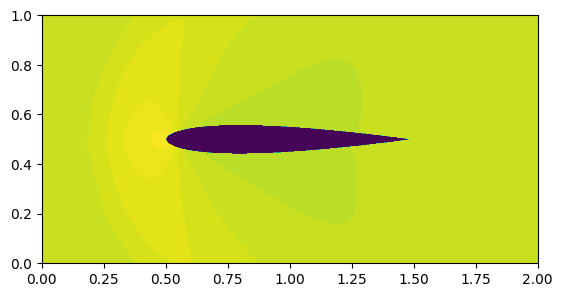

In [9]:
plt.figure()
plt.contourf(x_grid[:,0,:],y_grid[:,0,:],ue,60)
#plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.scatter(x_int_train[:,1],)
#plt.pcolor(x[:],u[:,1])
#plt.pcolor(x[:],u[:,2])
ax = plt.gca()
ax.set_aspect(1)
plt.show()
plt.savefig("Riemann2.pdf", dpi=150)


In [85]:
            #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#surf = ax.plot_surface(x_grid[:,0,:], y_grid[:,0,:], ue, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)
#
## Customize the z axis.
#ax.set_zlim(0, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
## A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')
#
## Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.show()

In [ ]:
xlimits = np.array([[0.,Tend],[0.0, 3], [0.0,3]])  #interal
sampling = LHS(xlimits=xlimits)
x_int_train = sampling(num_int)
A = []
for i in range(num_int):
    x = x_int_train[i,1]
    y = x_int_train[i,2]
    if (x< 0.5 and y< 1.5):
        A.append(i)
x_int_train = np.delete(x_int_train,A,axis=0)

In [ ]:
plt.figure()
plt.scatter(x_int_train[1:1000,1],x_int_train[1:1000,2])
#plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.scatter(x_int_train[:,1],)
#plt.pcolor(x[:],u[:,1])
#plt.pcolor(x[:],u[:,2])
ax = plt.gca()
ax.set_aspect(1)
plt.show()

In [ ]:
torch.save(model,'2DRiemanncase8.pt')

In [ ]:
model

In [ ]:
#device1 = torch.device("cpu")
#model.load_state_dict(torch.load(PATH))
#model = model.to(device1)
#torch.save(model,'2DRiemanncase8.pt')
model = torch.load('2DRiemanncase8.pt')

In [ ]:
model